# COGS 108 - Data Checkpoint

# Names

- Colby Hillers
- Calvin Cheung
- Jorge Mendoza
- Javon Maxie
- Hoang Nguyen

<a id='research_question'></a>
# Research Question

In the NBA, over the regular season, do international players have a higher Efficiency Metric (EFF) than players born in the United States?

# Dataset(s)


- Dataset Name: Basketball Players Stats. Extended analysis.
- Link to the dataset: https://www.kaggle.com/isaienkov/basketball-players-stats-extended-analysis/data
- Number of observations: 53,949

This dataset includes the necessary stats and attributes for us to calculate the EFF for each player in the NBA since the 1999-2000 season.

# Setup

In [230]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Data Cleaning

Describe your data cleaning steps here.

* Explore the data by checking the shape and info of the dataset
* Check for missing values
* Filter data based on regular season
* Drop irrelevant columns
* Adding new columns for analysis (Missed FG, Missed FT, and EFF)

In [231]:
# read the data
df = pd.read_csv('players_stats_by_season_full_details.csv')

# check the first five rows
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,1,432,824,223,255,336,742,1078,299,36,239,2344,1972.0,Mar,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,236,436,551,178,263,150,326,476,322,110,92,2107,1977.0,Jan,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,8,589,739,231,229,169,610,779,304,79,71,2095,1963.0,Jul,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,261,442,620,230,162,71,196,267,328,144,5,1989,1975.0,Jun,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,520,311,423,224,178,100,429,529,732,153,18,1982,1968.0,Jul,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics


In [232]:
# check the shape of the dataset
df.shape

(53949, 34)

In [233]:
# check info and datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53949 entries, 0 to 53948
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       53949 non-null  object 
 1   Season       53949 non-null  object 
 2   Stage        53949 non-null  object 
 3   Player       53949 non-null  object 
 4   Team         53938 non-null  object 
 5   GP           53949 non-null  int64  
 6   MIN          53949 non-null  float64
 7   FGM          53949 non-null  int64  
 8   FGA          53949 non-null  int64  
 9   3PM          53949 non-null  int64  
 10  3PA          53949 non-null  int64  
 11  FTM          53949 non-null  int64  
 12  FTA          53949 non-null  int64  
 13  TOV          53949 non-null  int64  
 14  PF           53949 non-null  int64  
 15  ORB          53949 non-null  int64  
 16  DRB          53949 non-null  int64  
 17  REB          53949 non-null  int64  
 18  AST          53949 non-null  int64  
 19  STL 

In [234]:
# return the rows with one or more missing data
null_rows = df[df.isnull().any(axis=1)] 

# check for the total of rows with at least one missing data
df.isnull().any(axis=1).sum()

46113

The columns with missing values are irrelevant for our analysis because they do not indicate players' performance in basketball. 

In [235]:
# check to see which columns have missing data
df.isnull().any()

League         False
Season         False
Stage          False
Player         False
Team            True
GP             False
MIN            False
FGM            False
FGA            False
3PM            False
3PA            False
FTM            False
FTA            False
TOV            False
PF             False
ORB            False
DRB            False
REB            False
AST            False
STL            False
BLK            False
PTS            False
birth_year      True
birth_month     True
birth_date      True
height          True
height_cm       True
weight          True
weight_kg       True
nationality     True
high_school     True
draft_round     True
draft_pick      True
draft_team      True
dtype: bool

In [236]:
# filter the data based on regular season only
df = df[(df.Stage == 'Regular_Season')]

# slicing to display all rows and remove the last four columns (high_school, draft_round, draft_pick, and, draft_team)
# we do not need these four columns for analysis
df = df.iloc[:, :30]

Luckily, the columns that we removed (or do not care about) happen to contain missing values so we don't need to worry about NaNs. Now, there are no missing values in our data.

In [237]:
# dropping these columns since they are irrelevant for our analysis
df = df.drop(['Team', 'ORB', 'DRB', '3PM', '3PA', 'birth_year', 'birth_month', 'birth_date','height', 'height_cm', 'weight', 'weight_kg'],  axis = 1)

# assigning a new column 'Missed_FG' by calculating the difference of 'FGA' (Field Goals Attempted) and 'FGM' (Field Goals Made)
df = df.assign(Missed_FG = df['FGA'] - df['FGM'])

# assigning a new column 'Missed_FT' by calculating the difference of 'FTA' (Free Throws Attempted) and 'FTM' (Free Throws Made)
df = df.assign(Missed_FT = df['FTA'] - df['FTM'])

# assigning a new column 'EEF' to calculate the EEF (Efficiency) for each players
df = df.assign(EEF = (df['PTS'] + df['REB'] + df['AST'] + df['STL'] + df['BLK'] - df['Missed_FG'] - df['Missed_FT'] - df['TOV'])/ df['GP'] )

# describe the statistics of numerical features
df.describe()

,GP,MIN,FGM,FGA,FTM,FTA,TOV,PF,REB,AST,STL,BLK,PTS,Missed_FG,Missed_FT,EEF
count,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000
mean,73.176471,1950.109489,311.484113,679.861958,153.726921,201.062258,112.201159,163.173250,344.750751,182.651997,61.802490,39.515887,837.150708,368.377845,47.335337,12.725857
std,8.751048,637.080061,161.071675,343.608427,116.259952,145.445479,60.100686,52.905317,193.771635,148.398607,32.540094,39.989813,447.531333,189.024833,39.224291,5.787311
min,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,69.000000,1473.000000,189.000000,416.250000,71.000000,94.250000,67.000000,125.000000,205.000000,77.000000,38.000000,13.000000,495.250000,222.000000,22.000000,8.408797
50%,75.000000,1955.100000,281.000000,621.000000,121.000000,162.000000,101.000000,162.000000,298.000000,136.000000,56.000000,26.000000,751.000000,337.000000,37.000000,11.701852
75%,80.000000,2439.675000,409.000000,890.000000,202.000000,265.000000,146.000000,200.000000,439.000000,242.000000,80.000000,51.000000,1094.000000,483.000000,61.000000,16.148921
max,85.000000,3485.000000,978.000000,2173.000000,756.000000,972.000000,464.000000,371.000000,1247.000000,925.000000,225.000000,307.000000,2832.000000,1195.000000,473.000000,35.250000


In [238]:
df_US = df[df['nationality'] == 'United States']
df_INT = df[df['nationality'] != 'United States']

In [239]:
df_US.head()

,League,Season,Stage,Player,GP,MIN,FGM,FGA,FTM,FTA,TOV,PF,REB,AST,STL,BLK,PTS,nationality,Missed_FG,Missed_FT,EEF
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,79,3163.0,956,1665,432,824,223,255,1078,299,36,239,2344,United States,709,392,33.822785
1,NBA,1999 - 2000,Regular_Season,Vince Carter,82,3126.0,788,1696,436,551,178,263,476,322,110,92,2107,United States,908,115,23.243902
2,NBA,1999 - 2000,Regular_Season,Karl Malone,82,2947.0,752,1476,589,739,231,229,779,304,79,71,2095,United States,724,150,27.109756
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,70,2853.0,729,1733,442,620,230,162,267,328,144,5,1989,United States,1004,178,18.871429
4,NBA,1999 - 2000,Regular_Season,Gary Payton,82,3425.0,747,1666,311,423,224,178,529,732,153,18,1982,United States,919,112,26.329268


In [240]:
df_INT.head()

,League,Season,Stage,Player,GP,MIN,FGM,FGA,FTM,FTA,TOV,PF,REB,AST,STL,BLK,PTS,nationality,Missed_FG,Missed_FT,EEF
30,NBA,1999 - 2000,Regular_Season,Dirk Nowitzki,82,2938.0,515,1118,289,348,141,256,532,203,63,68,1435,Germany,603,59,18.268293
60,NBA,1999 - 2000,Regular_Season,Rik Smits,79,1852.0,431,890,156,211,108,249,401,85,20,100,1018,Netherlands,459,55,12.683544
65,NBA,1999 - 2000,Regular_Season,Vlade Divac,82,2374.0,384,764,230,333,190,251,656,244,103,103,1005,Serbia,380,103,17.536585
78,NBA,1999 - 2000,Regular_Season,Dikembe Mutombo,82,2984.0,322,573,298,421,174,248,1157,105,27,269,942,Democratic Republic of the Congo,251,123,23.804878
80,NBA,1999 - 2000,Regular_Season,Patrick Ewing,62,2035.0,361,775,207,283,142,196,604,58,36,84,929,United States / Jamaica,414,76,17.403226


From the summary above, we can see one player has their nationality listed as United States / Jamaica. This is problematic since we group players as international or national.

We need to single out players who are listed as having multiple nationalities.

In [241]:
# gets players who have multiple nationalities
df[df['nationality'].str.contains('/')]

,League,Season,Stage,Player,GP,MIN,FGM,FGA,FTM,FTA,TOV,PF,REB,AST,STL,BLK,PTS,nationality,Missed_FG,Missed_FT,EEF
80,NBA,1999 - 2000,Regular_Season,Patrick Ewing,62,2035.0,361,775,207,283,142,196,604,58,36,84,929,United States / Jamaica,414,76,17.403226
86,NBA,1999 - 2000,Regular_Season,Peja Stojakovic,74,1749.0,321,717,135,153,88,97,276,106,52,7,877,Serbia / Greece,396,18,11.027027
89,NBA,1999 - 2000,Regular_Season,Wally Szczerbiak,73,2169.0,342,669,133,161,83,175,272,201,58,23,845,United States / Spain,327,28,13.164384
100,NBA,1999 - 2000,Regular_Season,Michael Olowokandi,80,2493.0,330,756,123,189,177,304,656,38,35,140,783,Nigeria / England,426,66,12.287500
125,NBA,1999 - 2000,Regular_Season,Shawn Bradley,77,1901.0,266,555,114,149,74,260,497,60,71,190,647,United States / Germany,289,35,13.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51931,NBA,2019 - 2020,Regular_Season,Maurice Harkless,62,1426.8,142,283,39,66,53,148,240,68,58,33,357,United States / Puerto Rico,141,27,8.629032
51932,NBA,2019 - 2020,Regular_Season,Frank Ntilikina,57,1186.6,131,333,51,59,71,142,121,172,54,16,357,Belgium / France,202,8,7.701754
51936,NBA,2019 - 2020,Regular_Season,Abdel Nader,55,867.0,123,263,51,66,43,78,100,38,23,20,345,United States / Egypt,140,15,5.963636
51953,NBA,2019 - 2020,Regular_Season,Thon Maker,60,776.0,93,193,73,110,45,102,167,43,25,39,281,South Sudan / Australia,100,37,6.216667


Next, we single out only the nationalities.

In [242]:
# lists out nationalities
df[df['nationality'].str.contains('/')]['nationality'].unique()

array(['United States / Jamaica', 'Serbia / Greece',
       'United States / Spain', 'Nigeria / England',
       'United States / Germany', 'Germany / United States',
       'Canada / Bahamas',
       'Saint Vincent and the Grenadines / United States',
       'Canada / South Africa', 'United States / Norway',
       'Puerto Rico / United States', 'United States / Qatar',
       'Canada / Haiti', 'Netherlands / United States',
       'England / United States', 'England / South Sudan',
       'United States / Dominican Republic', 'Netherlands / South Sudan',
       'United States / Nigeria', 'Argentina / Italy',
       'Dominican Republic / United States', 'England / Nigeria',
       'United States / Philippines', 'France / United States',
       'United States / Lebanon', 'Republic of the Congo / Spain',
       'Switzerland / Turkey', 'Switzerland / Montenegro',
       'United States / Greece', 'United States / Puerto Rico',
       'Italy / United States', 'United States / Australia',
 

Following this, we created the place_nationality function seen below takes in a string and places players into a single nationality if their nationality is listed as United States / (another region). We determined which single nationality the player belongs to by conducting research on factors such as what team they represent on the national level and their birthplace.

In [243]:
# places players in single nationality based off represented region
def place_nationality(string):
  # Sorts players into singular nationality if listed as US / (other)
  # Players through background research on each player
  string = string.replace('United States / Jamaica', 'United States')
  string = string.replace('United States / Spain', 'United States')
  string = string.replace('United States / Germany', 'United States')
  string = string.replace('Germany / United States', 'Germany')
  string = string.replace('Saint Vincent and the Grenadines / United States', 'Saint Vincent and the Grenadines')
  string = string.replace('United States / Norway', 'United States')
  string = string.replace('Puerto Rico / United States', 'Puerto Rico')
  string = string.replace('United States / Qatar', 'United States')
  string = string.replace('Netherlands / United States', 'Netherlands')
  string = string.replace('England / United States', 'England')
  string = string.replace('United States / Dominican Republic', 'United States')
  string = string.replace('United States / Nigeria', 'United States')
  string = string.replace('Dominican Republic / United States', 'Dominican Republic')
  string = string.replace('United States / Philippines', 'United States')
  string = string.replace('France / United States', 'France')
  string = string.replace('United States / Lebanon', 'United States')
  string = string.replace('United States / Greece', 'United States')
  string = string.replace('United States / Puerto Rico', 'United States')
  string = string.replace('Italy / United States', 'Italy')
  string = string.replace('United States / Australia', 'United States')
  string = string.replace('United States / Turkey', 'United States')
  string = string.replace('Canada / United States', 'Canada')
  string = string.replace('United States / Lithuania', 'United States')
  string = string.replace('United States / Croatia', 'United States')
  string = string.replace('United States / Democratic Republic of the Congo', 'United States')
  string = string.replace('United States / Egypt', 'United States')
  string = string.replace('Nigeria / United States', 'Nigeria')
  string = string.replace('United States / Israel', 'United States')

  return string

Finally, we apply the function to the dataframe.

In [244]:
# apply function to nationality column
df['nationality'] = df['nationality'].apply(place_nationality)

# lists out nationalities
df['nationality'].unique()

array(['United States', 'Germany', 'Netherlands', 'Serbia',
       'Democratic Republic of the Congo', 'Serbia / Greece',
       'Nigeria / England', 'Lithuania', 'Ukraine', 'Canada / Bahamas',
       'Slovenia', 'Australia', 'Haiti',
       'Saint Vincent and the Grenadines', 'Canada / South Africa',
       'Dominican Republic', 'Turkey', 'Canada', 'Finland', 'Spain',
       'Russia', 'France', 'Mexico', 'China', 'Croatia', 'Brazil',
       'Montenegro', 'Argentina', 'Georgia', 'Senegal', 'Puerto Rico',
       'Czech Republic', 'Canada / Haiti', 'England',
       'England / South Sudan', 'Netherlands / South Sudan', 'Latvia',
       'Italy', 'Argentina / Italy', 'Switzerland', 'England / Nigeria',
       'Cameroon', 'Poland', 'Israel', 'Sweden',
       'Republic of the Congo / Spain', 'Venezuela', 'Panama',
       'Switzerland / Turkey', 'Switzerland / Montenegro', 'Nigeria',
       'Tanzania', 'Bosnia and Herzegovina', 'Greece / Nigeria',
       'New Zealand', 'Montenegro / Spain',
 

In [245]:
# Places international and US players in respectives dataframes
df_US = df[df['nationality'] == 'United States']
df_INT = df[df['nationality'] != 'United States']

In [246]:
# Convert each players total season stats into season averages
df_US.iloc[:,5:17] = df.iloc[:,5:17].div(df_US['GP'], axis=0)
df_US.iloc[:,18:20] = df.iloc[:,18:20].div(df_US['GP'], axis=0)
df_INT.iloc[:,5:17] = df.iloc[:,5:17].div(df_INT['GP'], axis=0)
df_INT.iloc[:,18:20] = df.iloc[:,18:20].div(df_INT['GP'], axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [247]:
df_US.head()

,League,Season,Stage,Player,GP,MIN,FGM,FGA,FTM,FTA,TOV,PF,REB,AST,STL,BLK,PTS,nationality,Missed_FG,Missed_FT,EEF
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,79,40.037975,12.101266,21.075949,5.468354,10.430380,2.822785,3.227848,13.645570,3.784810,0.455696,3.025316,29.670886,United States,8.974684,4.962025,33.822785
1,NBA,1999 - 2000,Regular_Season,Vince Carter,82,38.121951,9.609756,20.682927,5.317073,6.719512,2.170732,3.207317,5.804878,3.926829,1.341463,1.121951,25.695122,United States,11.073171,1.402439,23.243902
2,NBA,1999 - 2000,Regular_Season,Karl Malone,82,35.939024,9.170732,18.000000,7.182927,9.012195,2.817073,2.792683,9.500000,3.707317,0.963415,0.865854,25.548780,United States,8.829268,1.829268,27.109756
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,70,40.757143,10.414286,24.757143,6.314286,8.857143,3.285714,2.314286,3.814286,4.685714,2.057143,0.071429,28.414286,United States,14.342857,2.542857,18.871429
4,NBA,1999 - 2000,Regular_Season,Gary Payton,82,41.768293,9.109756,20.317073,3.792683,5.158537,2.731707,2.170732,6.451220,8.926829,1.865854,0.219512,24.170732,United States,11.207317,1.365854,26.329268


In [248]:
df_INT.head()

,League,Season,Stage,Player,GP,MIN,FGM,FGA,FTM,FTA,TOV,PF,REB,AST,STL,BLK,PTS,nationality,Missed_FG,Missed_FT,EEF
30,NBA,1999 - 2000,Regular_Season,Dirk Nowitzki,82,35.829268,6.280488,13.634146,3.524390,4.243902,1.719512,3.121951,6.487805,2.475610,0.768293,0.829268,17.500000,Germany,7.353659,0.719512,18.268293
60,NBA,1999 - 2000,Regular_Season,Rik Smits,79,23.443038,5.455696,11.265823,1.974684,2.670886,1.367089,3.151899,5.075949,1.075949,0.253165,1.265823,12.886076,Netherlands,5.810127,0.696203,12.683544
65,NBA,1999 - 2000,Regular_Season,Vlade Divac,82,28.951220,4.682927,9.317073,2.804878,4.060976,2.317073,3.060976,8.000000,2.975610,1.256098,1.256098,12.256098,Serbia,4.634146,1.256098,17.536585
78,NBA,1999 - 2000,Regular_Season,Dikembe Mutombo,82,36.390244,3.926829,6.987805,3.634146,5.134146,2.121951,3.024390,14.109756,1.280488,0.329268,3.280488,11.487805,Democratic Republic of the Congo,3.060976,1.500000,23.804878
86,NBA,1999 - 2000,Regular_Season,Peja Stojakovic,74,23.635135,4.337838,9.689189,1.824324,2.067568,1.189189,1.310811,3.729730,1.432432,0.702703,0.094595,11.851351,Serbia / Greece,5.351351,0.243243,11.027027


# Data Analysis & Results (EDA)

In [249]:
df_US.describe()

,GP,MIN,FGM,FGA,FTM,FTA,TOV,PF,REB,AST,STL,BLK,PTS,Missed_FG,Missed_FT,EEF
count,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000
mean,73.231275,26.765433,4.275291,9.408648,2.120937,2.771331,1.532951,2.206905,4.575394,2.528817,0.871902,0.512588,11.527910,5.133356,0.650394,12.699911
std,8.728503,7.595336,2.130307,4.557657,1.581294,1.976040,0.798819,0.631901,2.463575,1.968520,0.433230,0.510248,5.964697,2.513256,0.535293,5.804289
min,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,69.000000,20.887838,2.670732,5.926829,1.000000,1.351351,0.922078,1.760563,2.789474,1.106383,0.553846,0.182927,7.060976,3.192308,0.301370,8.382353
50%,75.000000,27.037037,3.859155,8.546667,1.672131,2.235294,1.362500,2.197368,3.986667,1.924528,0.796610,0.347826,10.231707,4.700000,0.512500,11.672131
75%,80.000000,33.045833,5.506667,12.234568,2.802469,3.610390,2.000000,2.649351,5.769231,3.325000,1.102941,0.650000,14.876712,6.703704,0.829268,16.037037
max,85.000000,43.700000,12.225000,27.816667,10.176471,13.135135,5.728395,4.524390,15.987179,11.698113,2.885246,3.721519,36.128205,16.733333,6.391892,33.827160


In [250]:
df_INT.describe()

,GP,MIN,FGM,FGA,FTM,FTA,TOV,PF,REB,AST,STL,BLK,PTS,Missed_FG,Missed_FT,EEF
count,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,72.932005,24.939239,4.003287,8.405555,1.893568,2.493109,1.467276,2.245985,5.132848,2.243764,0.690422,0.640339,10.603309,4.402268,0.599540,12.841597
std,8.851942,7.164328,1.905975,3.878100,1.301579,1.611437,0.684425,0.620501,2.656686,1.906756,0.325657,0.586208,5.186511,2.081309,0.427223,5.712893
min,4.000000,8.580597,0.564516,1.096774,0.066667,0.177419,0.253731,0.735294,0.805556,0.103896,0.090909,0.000000,1.403226,0.532258,0.038462,2.328358
25%,68.000000,19.000000,2.492537,5.298507,0.919355,1.256098,0.931507,1.775000,3.095238,0.942857,0.450000,0.197183,6.449275,2.727273,0.296296,8.439394
50%,75.000000,25.190476,3.650000,7.878049,1.555556,2.077922,1.375000,2.243902,4.539683,1.646341,0.634146,0.437500,9.725806,4.098592,0.487805,11.865672
75%,80.000000,31.063014,5.282051,10.925373,2.487805,3.230769,1.890411,2.693333,6.862500,2.987805,0.885714,0.948718,13.986111,5.720000,0.771429,16.560606
max,82.000000,40.296296,10.873016,20.573770,8.156250,10.140625,4.262295,4.012821,14.109756,11.631579,2.329268,3.651515,29.476190,11.049180,3.666667,35.250000


## Career Box Score Stats EDA

This is just basic data analysis on the standard box scores averages over every players career between 2000 to 2020. 

**Notes: This section is very graph heavy right now. Looking into other methods for visualizing this data since each distribution is relatively similar.**

In [251]:
def shooting_eff_data(data1, data2, stat1, stat2, bins):

  FG_avg_1 = data1[stat1] / data1[stat2]
  FG_avg_2 = data2[stat1] / data2[stat2]

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=data1, x=FG_avg_1, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,1), title='United States')
  sns.histplot(data=data2, x=FG_avg_2, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,1), title='International')

  fig.tight_layout(pad=3)

  fig.show()

In [252]:
# Function that takes in DataFrame and column and averages the values and displays histogram

def stats_data(data1, data2, stat, bins, xlim):

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=data1, x=stat, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,xlim), title='United States')
  sns.histplot(data=data2, x=stat, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,xlim), title='International')

  fig.tight_layout(pad=3)

  fig.show()

### Field Goal Percentage (FGM / FGA)

Effective Field Goal Percentage: $$\frac{Points}{2 * (FGA+0.44*FTA)}$$

Standard Field-Goal Percentage


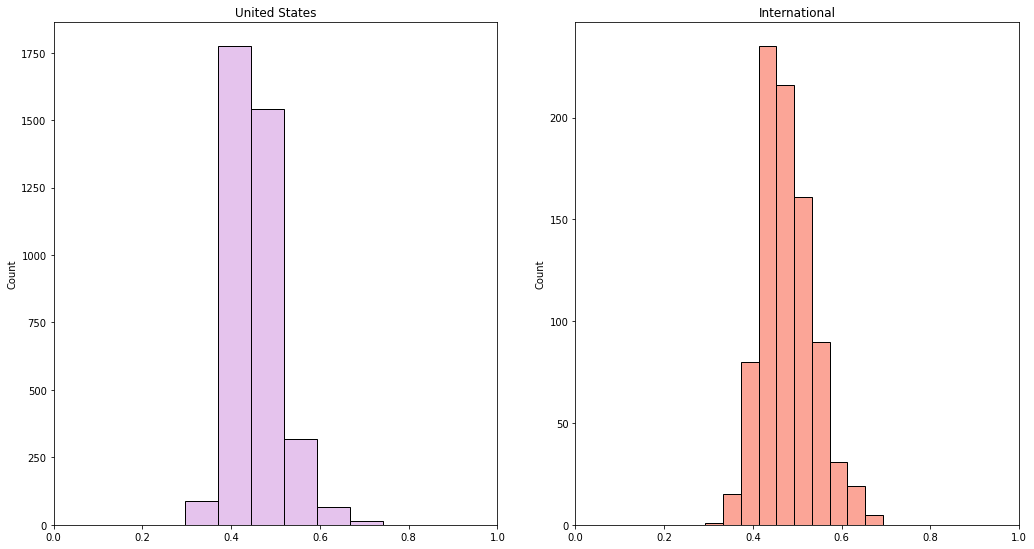

In [253]:
print('Standard Field-Goal Percentage')
shooting_eff_data(df_US, df_INT, 'FGM', 'FGA', 10)

We see both distributions are centered around 0.4-0.5 with no obvious outliers

Effective Field-Goal Percentage


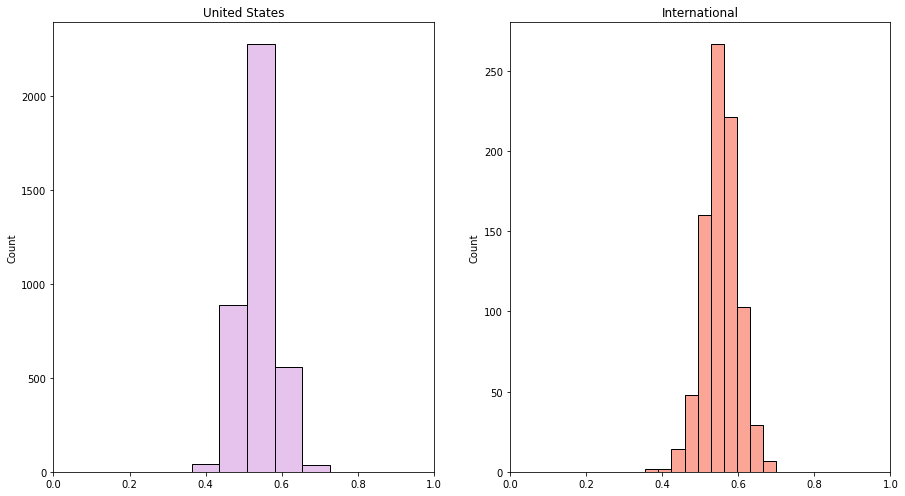

In [254]:
def effective_fg_per(US_data, INT_data, points, FGA, FTA, bins):
  
  avg_US = US_data[points] / (2*(US_data[FGA] + 0.44*US_data[FTA]))
  avg_INT = INT_data[points] / (2*(INT_data[FGA] + 0.44*INT_data[FTA]))

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=US_data, x=avg_US, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,1), title='United States')
  sns.histplot(data=INT_data, x=avg_INT, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,1), title='International')
  fig.show()

print('Effective Field-Goal Percentage')
effective_fg_per(df_US, df_INT, 'PTS', 'FGA', 'FTA', 10)

We see both distributions are centered around 0.5 with no obvious outliers

### Free Throw Percentage (FTM / FTA)

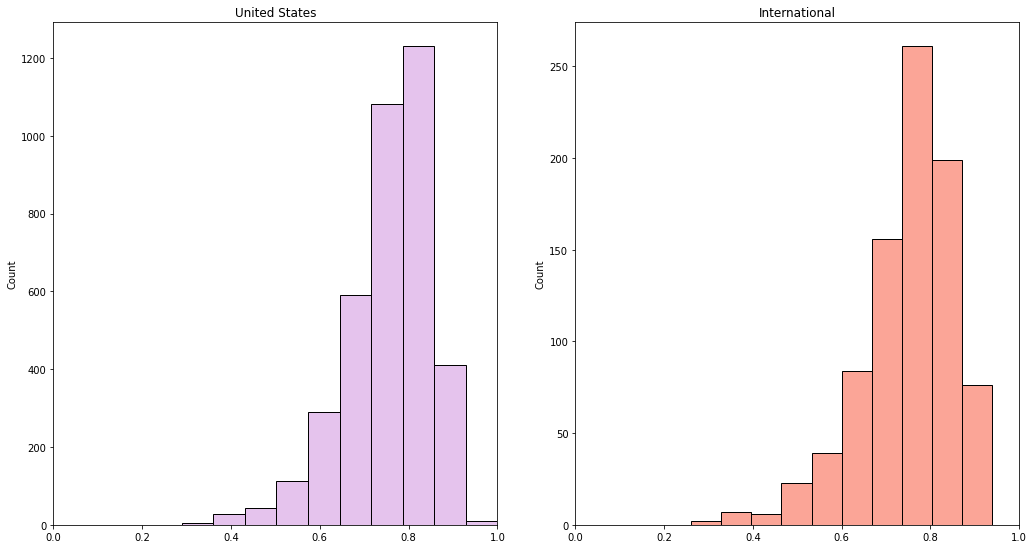

In [255]:
shooting_eff_data(df_US, df_INT, 'FTM', 'FTA', 10)

We both distributions are skewed left, but we also notice that the US has players shooting high 90% from the free throw line and international does not.

### Turnovers

Average Turnovers


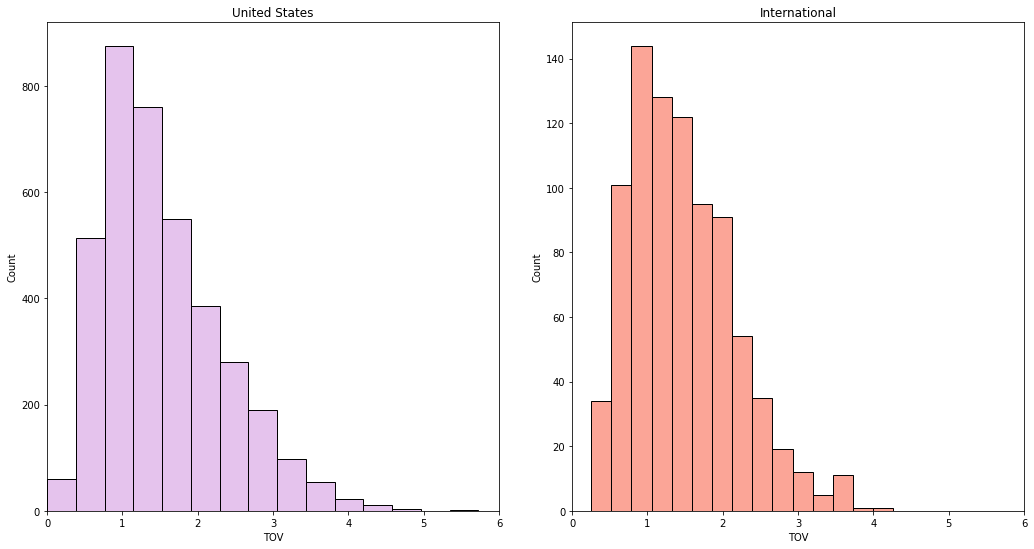

In [256]:
print('Average Turnovers')
stats_data(df_US, df_INT, 'TOV', 15, 6)

We both distributions are skewed to the right, however we see that the US distributions stretches farther right than the International. Additionally, it has an outlier at roughly 5.5.

Turnover Percentage: $$\frac{TOV}{FGA+0.44*FTA+TOV}$$

This statistic is an estimation of the number of turnovers a player will commit every 100 plays(Will go into more detail in final project).

Turnover Percentage


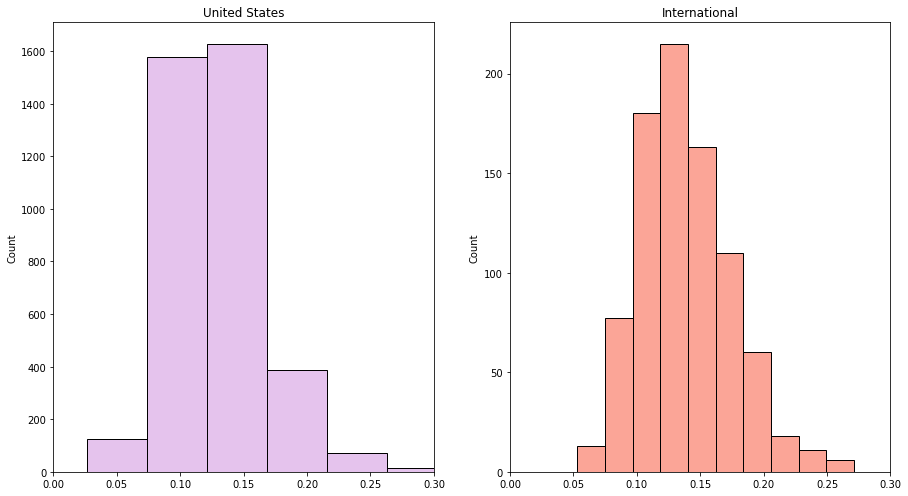

In [257]:
def turnover_per(US_data, INT_data, TO, FGA, FTA, bins):
  
  avg_US = US_data[TO] / (US_data[FGA] + 0.44*US_data[FTA] + US_data[TO])
  avg_INT = INT_data[TO] / (INT_data[FGA] + 0.44*INT_data[FTA] + INT_data[TO])

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=US_data, x=avg_US, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,.3), title='United States')
  sns.histplot(data=INT_data, x=avg_INT, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,.3), title='International')
  fig.show()

print('Turnover Percentage')
turnover_per(df_US, df_INT, 'TOV', 'FGA', 'FTA', 10)

Here we notice that international players seem to have less variability and seem to have a slightly less turnover percentage on average when compared to US players.

### Personal Fouls

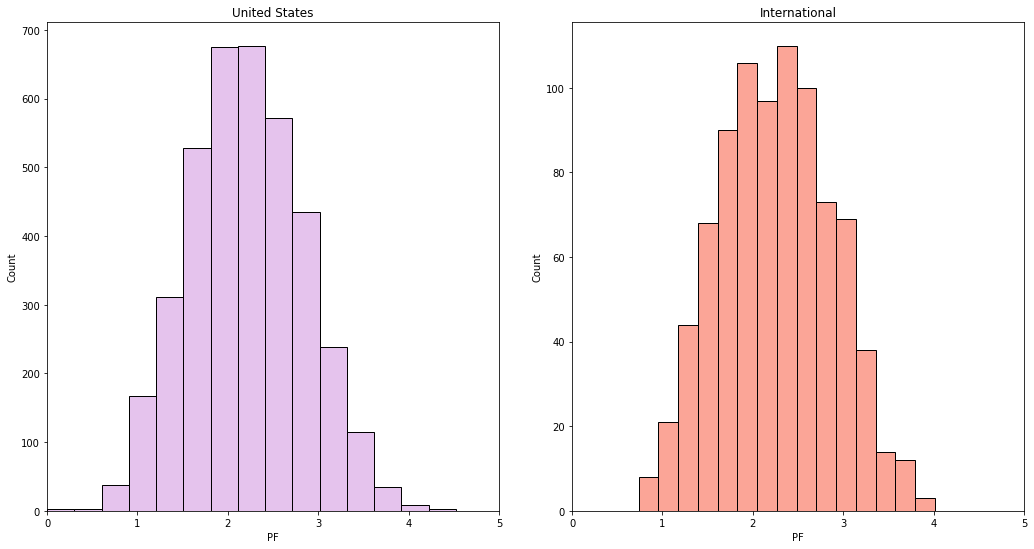

In [258]:
stats_data(df_US, df_INT, 'PF', 15, 5)

**Note: Personal fouls are not necessarily a good performance metric, but when compared with steals we can try to develop a model that shows effectiveness on defense.**

Here we see that both distributions are very similar where the US players seem to have a greater spread.

### Rebounds

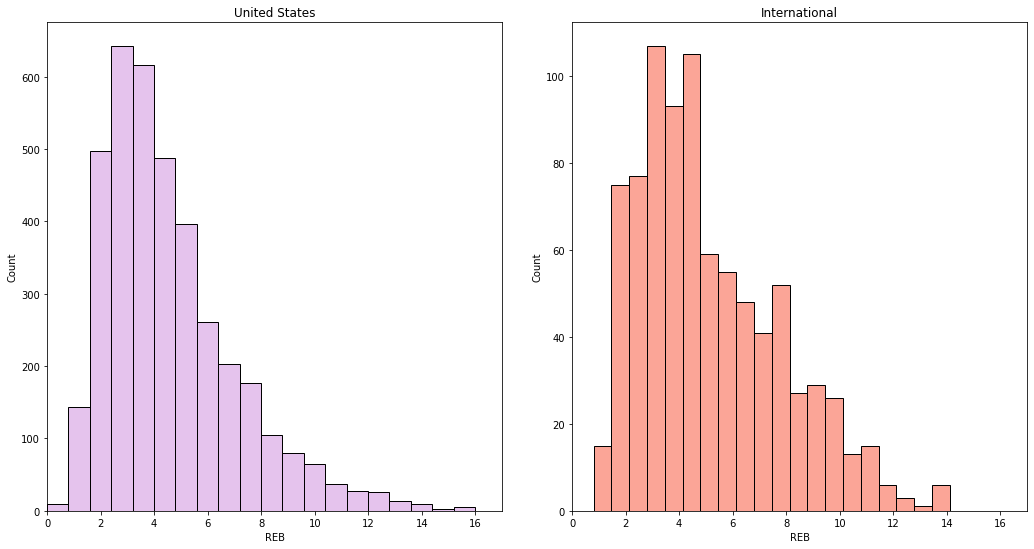

In [259]:
stats_data(df_US, df_INT, 'REB', 20, 17)

Here we see both distributions are skewed to the right, but the US seems to peak at about 2 rebounds higher than the International distribution.

### Assists

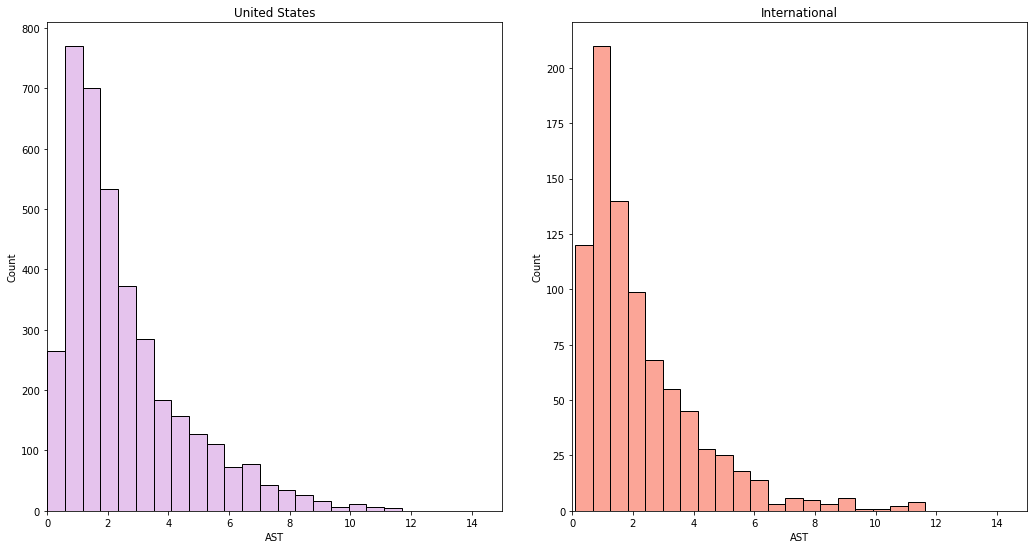

In [260]:
stats_data(df_US, df_INT, 'AST', 20, 15)

Both distributions here are skewed right and very similar.

### Steals

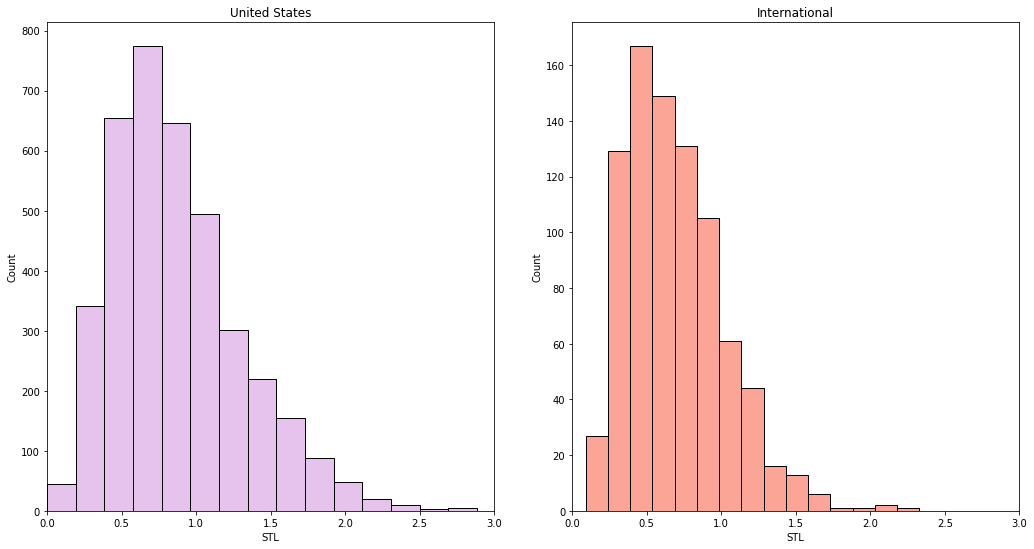

In [261]:
stats_data(df_US, df_INT, 'STL', 15, 3)

Both distributions appear to be slightly skewed right with means of roughly 0.6

### Blocks

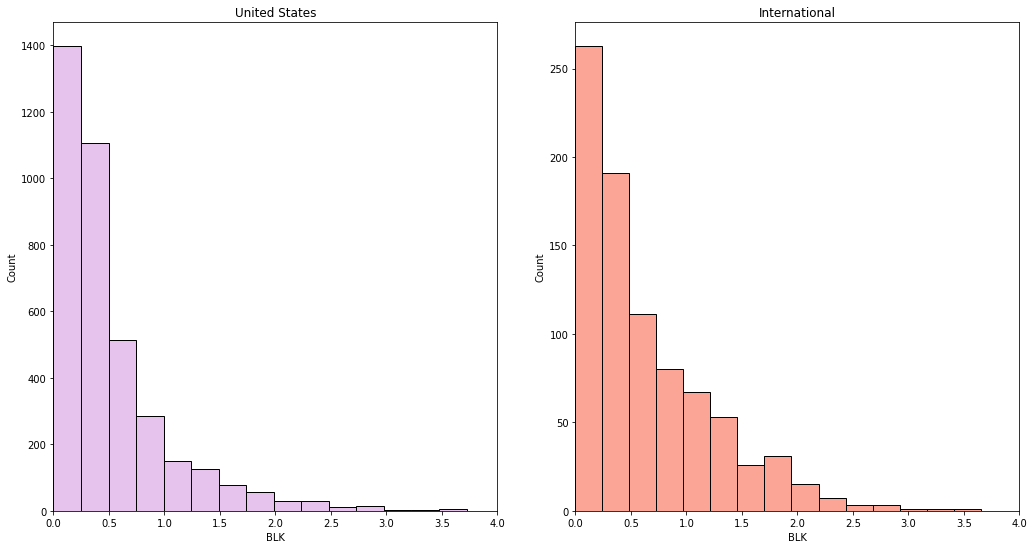

In [262]:
stats_data(df_US, df_INT, 'BLK', 15, 4)

Both distributions are skewed right and are very similar.

### Points

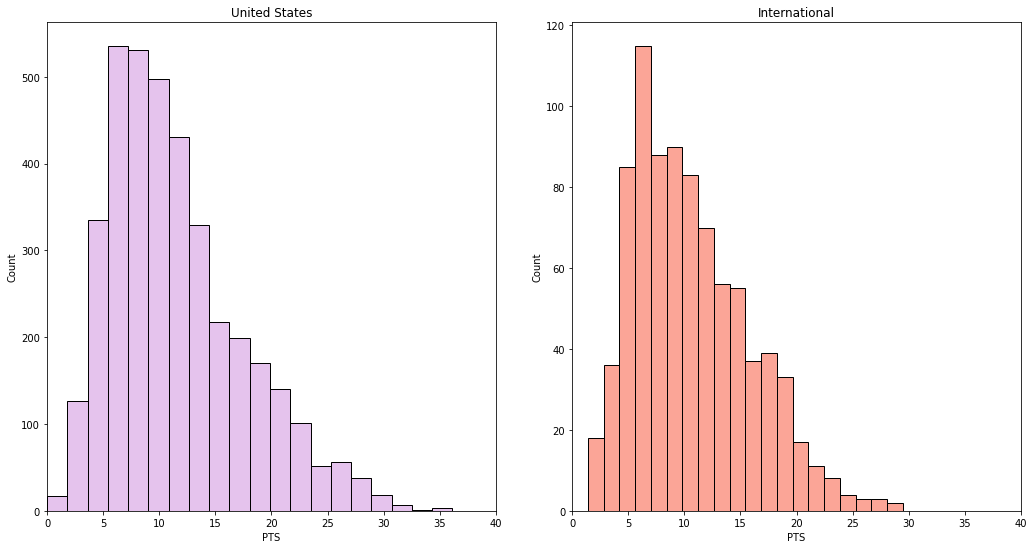

In [263]:
stats_data(df_US, df_INT, 'PTS', 20, 40)

Both distributions are skewed right, however the US does peak about 6-7 points higher than the International distribution.

### EEF Rating

**Note: This is going to be moved into it's own section**

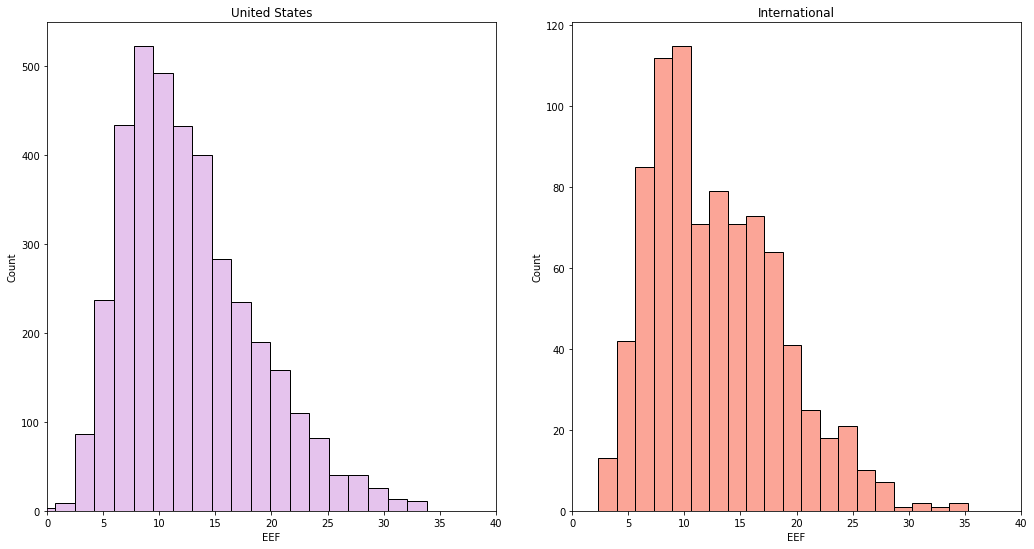

In [264]:
stats_data(df_US, df_INT, 'EEF', 20, 40)

### Points Per Possession

Points per possession measures how effectively a player can score the ball during a theoretically time window calculated through FGA, FTA, and TOV. These stats are used because they tend to be representative of how long a player has been playing. The formula:

$$\frac{Points}{FGA+0.44*FTA+TOV}$$


Points Per Possession


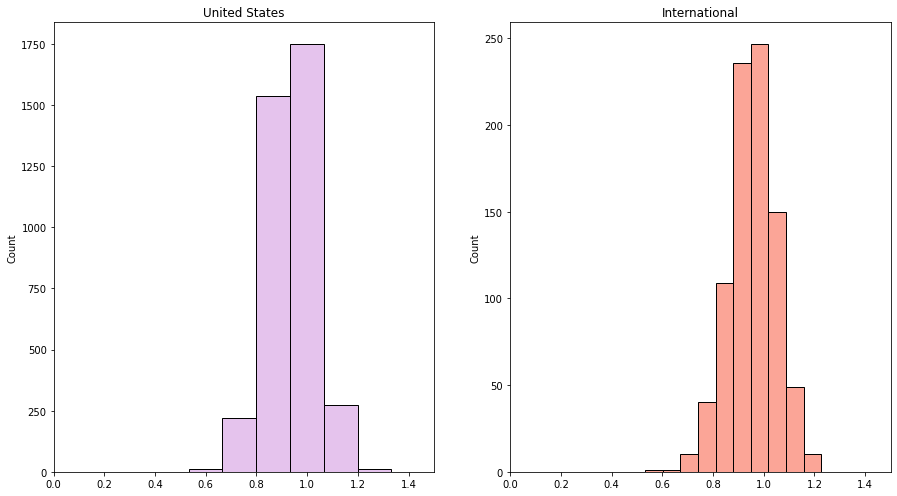

In [265]:
def ppp_rating(US_data, INT_data, points, TO, FGA, FTA, bins):
  
  avg_US = US_data[points] / (US_data[FGA] + 0.44*US_data[FTA] + US_data[TO])
  avg_INT = INT_data[points] / (INT_data[FGA] + 0.44*INT_data[FTA] + INT_data[TO])

  fig, ax =plt.subplots(1,2)
  sns.histplot(data=US_data, x=avg_US, bins=bins, color='#DDAFE8', ax=ax[0]).set(xlim=(0,1.5), title='United States')
  sns.histplot(data=INT_data, x=avg_INT, bins=bins, color='#FA8775', ax=ax[1]).set(xlim=(0,1.5), title='International')
  fig.show()

print('Points Per Possession')
ppp_rating(df_US, df_INT, 'PTS', 'TOV', 'FGA', 'FTA', 10)

Both distribution look to be centered at about 1.

### Interpretations

From what we can see, US and international players' box score statistics tend to be the same besides some minor differences and skew between them. However, that still doesn't mean these groups are necessarily performing the same. For this next part we are going to compare two statistics together from each group(US and International). 

## Joint Stats EDA

**Notes: Our team is currently doing more research on joint box score stats within the NBA. However, we believe these could be a good indicator into a player's offensive or defensive efficiency while on the court.**

### Assits vs Steals

United States


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


International


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


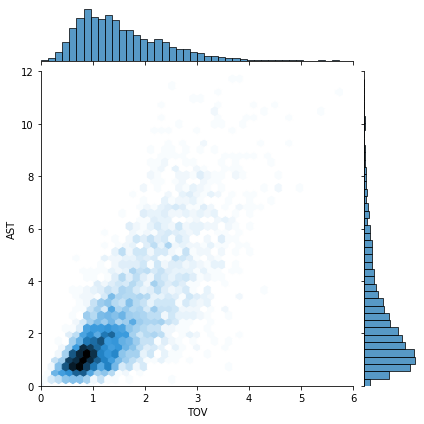

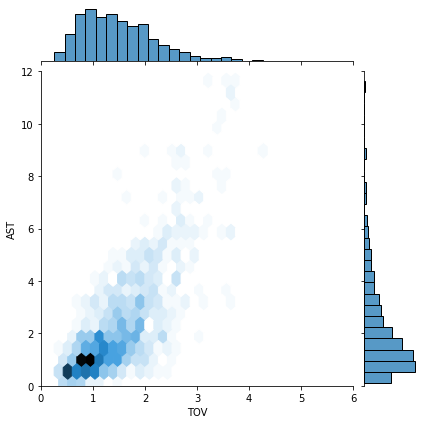

In [266]:
print('United States')
sns.jointplot(df_US['TOV'], df_US['AST'], xlim=(0,6), ylim=(0,12), kind='hex')

print('International')
sns.jointplot(df_INT['TOV'], df_INT['AST'], xlim=(0,6), ylim=(0,12), kind='hex')

### Minutes vs Field-Goal Percentage

United States


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


International


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


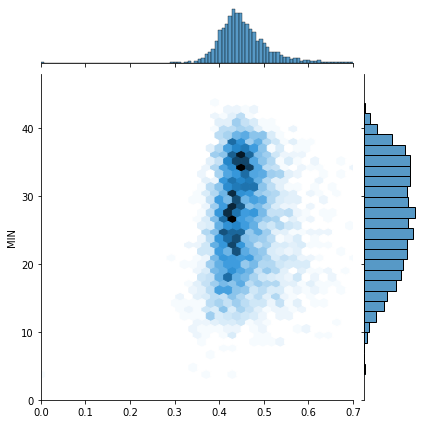

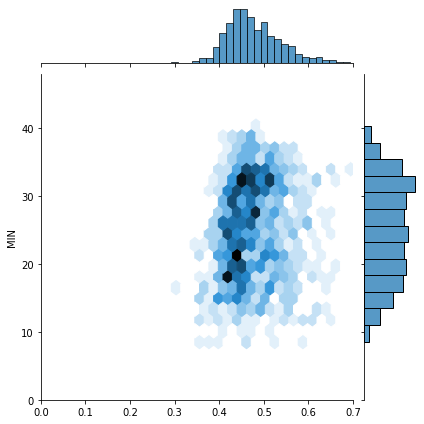

In [267]:
USA = df_US['FGM']/df_US['FGA']
INT = df_INT['FGM']/df_INT['FGA']

print('United States')
sns.jointplot(USA, df_US['MIN'], xlim=(0,.7), ylim=(0,48), kind='hex')

print('International')
sns.jointplot(INT, df_INT['MIN'], xlim=(0,.7), ylim=(0,48), kind='hex')

### Interpretations

## Season-by-Season EDA

**Notes: This is the most useful category in our EDA because it shows how our two groups of players have performed over time. This also helps account for the fact that years closer to 2000 didn't have as many international players as there are now, which can be seen in some graphs.**

In [268]:
# Combine US and International data frames together for more indepth analysis
df = pd.concat([df_US, df_INT]).reset_index()

# Rename nationalities to 'United States' and 'International'
df.loc[df['nationality'] != 'United States', 'nationality'] = 'International'

# Relabel 'Season' column so values only contain the year the season was completed
df['Season'] = df['Season'].str[7:]

In [269]:
def compare_seasons_per(df, stat1, stat2):

  percent = df[stat1] / df[stat2]

  rcParams['figure.figsize'] = 15,8.27
  sns.lineplot(data=df, x='Season', y=percent, hue='nationality')

def compare_seasons_stat(df, stat):
  
  rcParams['figure.figsize'] = 15,8.27
  sns.lineplot(data=df, x='Season', y=stat, hue='nationality')

### Field-Goal Percentage Since 2000

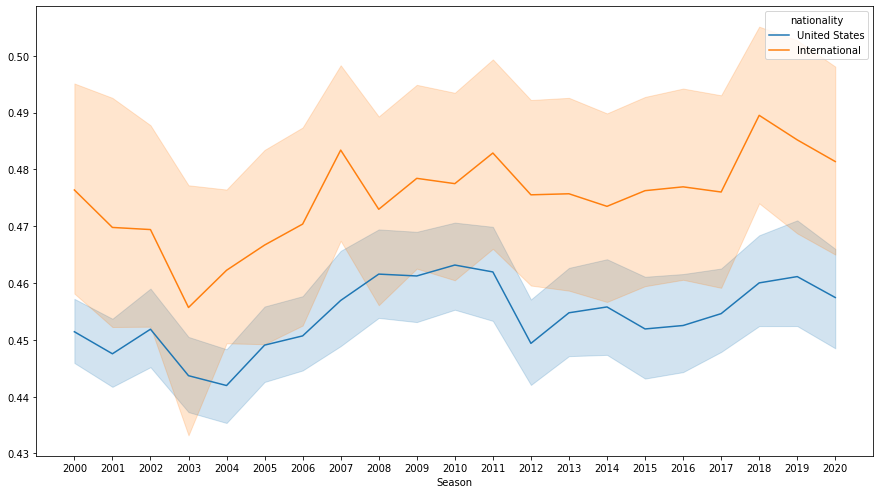

In [270]:
# Calculating Field-Goal Percentage for every season between US and International players
compare_seasons_per(df, 'FGM', 'FGA')

Over every season, international players have had a higher average FG% than US players.

### Free-Throw Percentage Since 2000

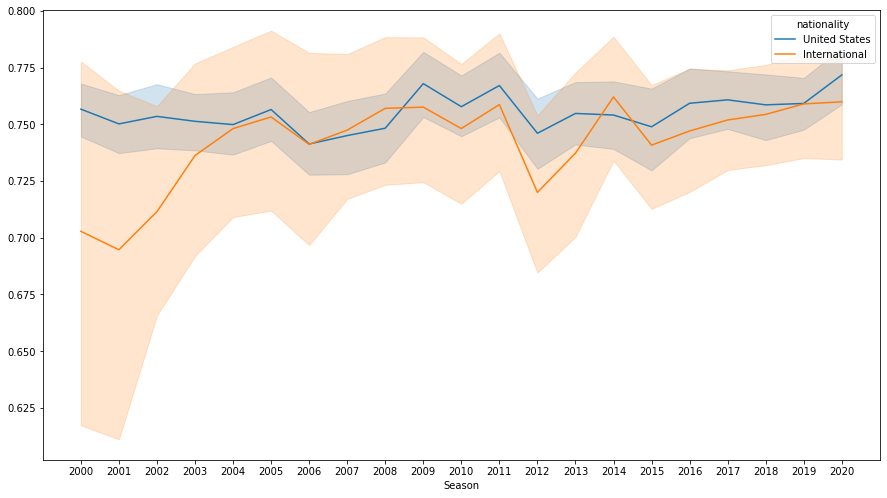

In [271]:
# Calculating Free Throw Percentage for every season between US and International players
compare_seasons_per(df, 'FTM', 'FTA')

It is currently unknown by our team why free throw percentage was significantly lower for international players in the early 2000s. However, as time progresses we see that they begin to become closer together.

### Rebounds Since 2000

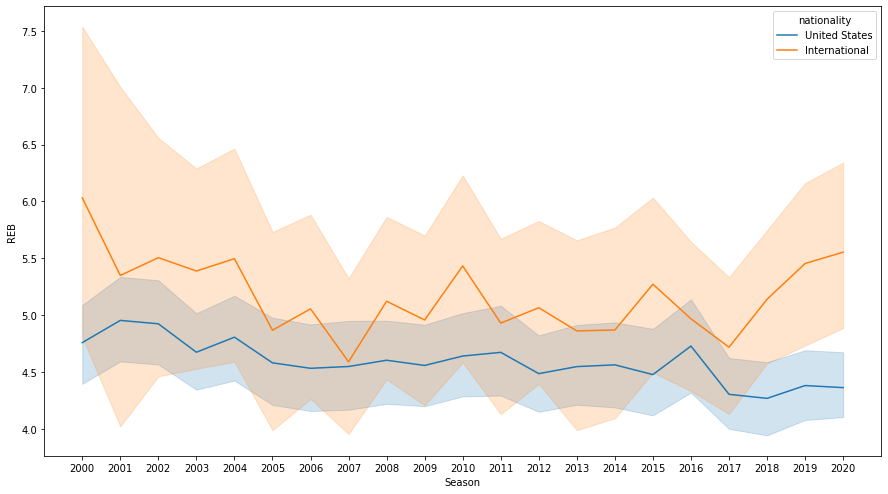

In [272]:
# Calculate avg rebounds by each group over every season
compare_seasons_stat(df, 'REB')

Once again, we see that international players consistently have higher averages for rebounds compared to US players.

### Assists Since 2000

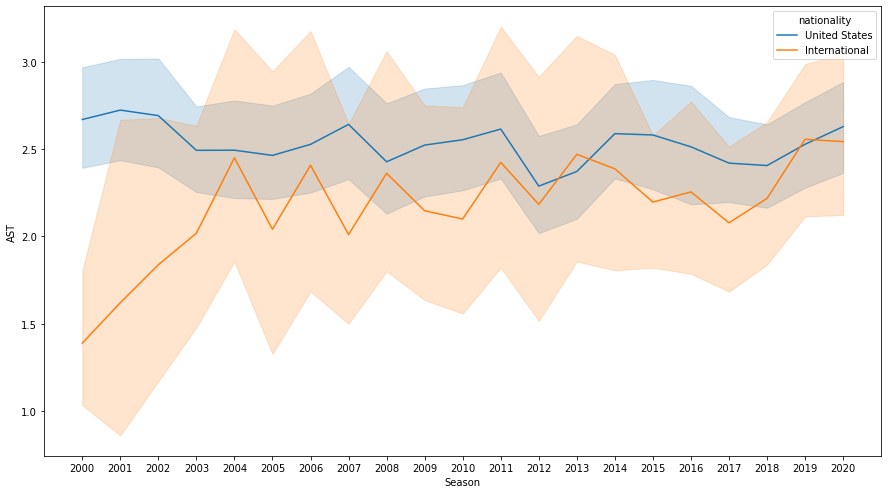

In [273]:
# Calculate avg assists by each group over every season
compare_seasons_stat(df, 'AST')

Here we see that US players are consistently averaging more assists than international players, however it should be noted that they are still reletively close.

### Steals Since 2000

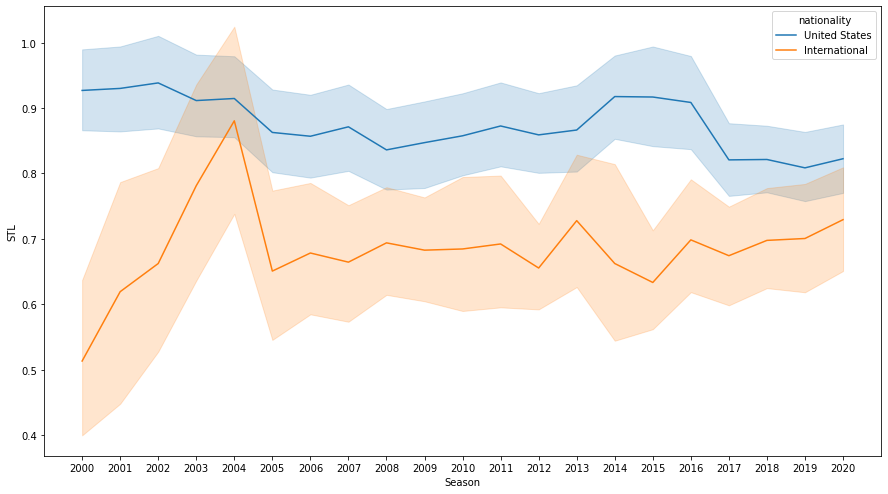

In [274]:
# Calculate avg steals by each group over every season
compare_seasons_stat(df, 'STL')

We see that US players consistently averaged more steals than international players. However, we are unsure why international players had significantly lower averages in the early 2000s and then peaked. 

### Blocks Since 2000

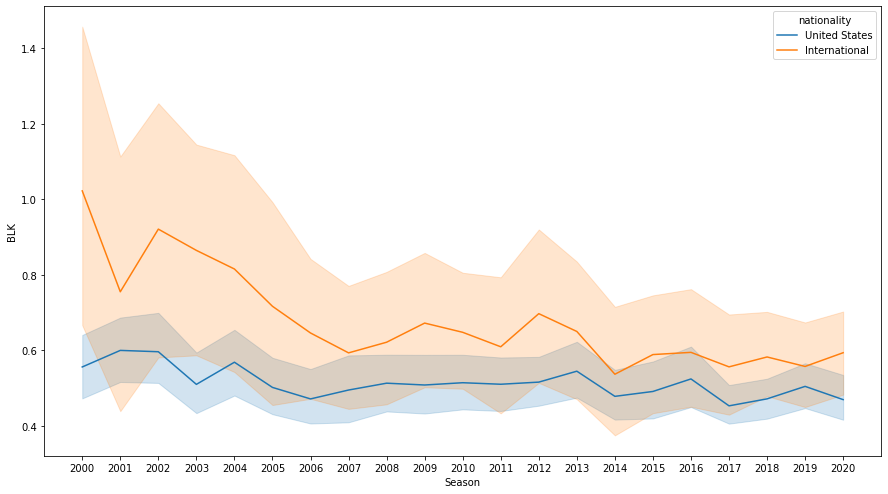

In [275]:
# Calculate avg blocks by each group over every season
compare_seasons_stat(df, 'BLK')

We see that international players averaged more blocks than US players over every season.

### Points Since 2000

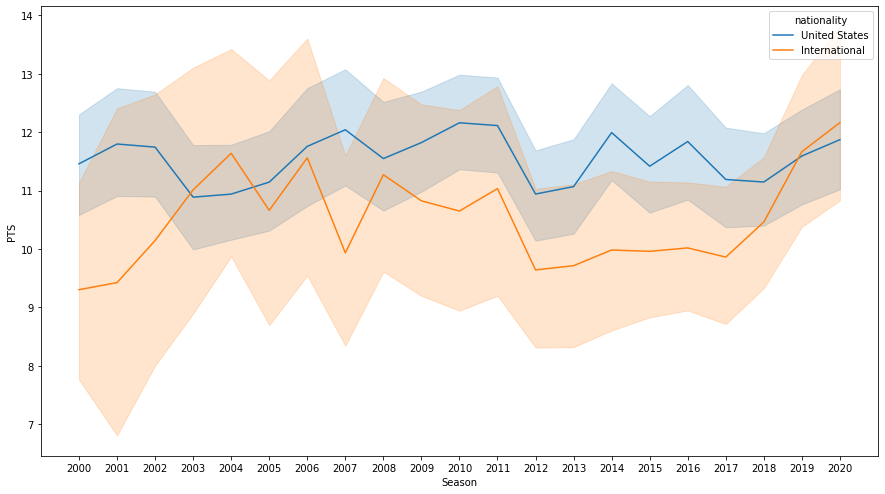

In [276]:
# Calculate avg points by each group over every season
compare_seasons_stat(df, 'PTS')

We see that their averages tend to fluctuate a lot and they switch between having the higher average.

### Interpretations

Here we are able to see trends over time of US players vs Internation players. This is helpful because over the past two decades international players have become more relevant in the NBA. Additionally, we can see that on average International players tend to do better in certain categories than US players.

# ToDo

* T-Tests
  - In-depth analysis 
* Improved visualizations
* Add extra references from research
* Results/Conclusion